In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
import os
cd=os.getcwd()
train_path=os.path.join(cd,"dataset","Train")
test_path=os.path.join(cd,"dataset","Test")
val_path=os.path.join(cd,"dataset","Valid")

In [4]:
training_set=tf.keras.utils.image_dataset_from_directory(
    train_path, labels="inferred",
    label_mode="categorical", 
    color_mode="rgb", 
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [5]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    val_path, labels="inferred",
    label_mode="categorical", 
    color_mode="rgb", 
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [10]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))



c:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy']
)

In [13]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=20)

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 818ms/step - accuracy: 0.3422 - loss: 1.7199 - val_accuracy: 0.4500 - val_loss: 0.9830
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 894ms/step - accuracy: 0.5510 - loss: 0.9191 - val_accuracy: 0.7700 - val_loss: 0.6059
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 949ms/step - accuracy: 0.7732 - loss: 0.5647 - val_accuracy: 0.8300 - val_loss: 0.3788
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8490 - loss: 0.3860 - val_accuracy: 0.8267 - val_loss: 0.3712
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8942 - loss: 0.2581 - val_accuracy: 0.8133 - val_loss: 0.4919
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8918 - loss: 0.2623 - val_accuracy: 0.9167 - val_loss: 0.2424
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8979 - loss: 0.2564 - val_accuracy: 0.9167 - val_loss: 0.2124
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9336 - loss: 0.1983 - val_accuracy: 0.9433 - 

In [15]:
train_loss,train_acc=cnn.evaluate(training_set)
print("Training accuracy =",train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.9788 - loss: 0.0554
Training accuracy = 0.9777777791023254


In [16]:
val_loss,val_acc=cnn.evaluate(validation_set)
print("Validation accuracy =",val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.9237 - loss: 0.2411
Validation accuracy = 0.9266666769981384


In [17]:
cnn.save("trained_plant_disease.keras")

In [18]:
training_history.history

{'accuracy': [0.39666667580604553,
  0.5944444537162781,
  0.7766666412353516,
  0.8633333444595337,
  0.9066666960716248,
  0.9066666960716248,
  0.9177777767181396,
  0.9422222375869751,
  0.9599999785423279,
  0.9388889074325562,
  0.9311110973358154,
  0.9700000286102295,
  0.9833333492279053,
  0.9477777481079102,
  0.9211111068725586,
  0.9755555391311646,
  0.9811111092567444,
  0.9944444298744202,
  0.995555579662323,
  0.9944444298744202],
 'loss': [1.316495418548584,
  0.8387820720672607,
  0.5186858177185059,
  0.36636650562286377,
  0.24087749421596527,
  0.23249399662017822,
  0.21700721979141235,
  0.1732645183801651,
  0.1081971749663353,
  0.15791793167591095,
  0.16859877109527588,
  0.07632213085889816,
  0.048836849629879,
  0.1457703411579132,
  0.19516338407993317,
  0.07369096577167511,
  0.048633281141519547,
  0.02413974329829216,
  0.015987062826752663,
  0.014363287016749382],
 'val_accuracy': [0.44999998807907104,
  0.7699999809265137,
  0.8299999833106995,
 

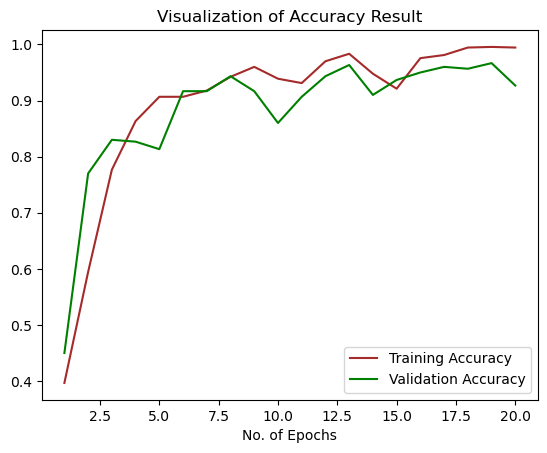

In [20]:
epochs = list(range(1, len(training_history.history['accuracy']) + 1))
plt.plot(epochs, training_history.history['accuracy'], color='brown', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()